In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [47]:
df = pd.read_csv("/hwdata/home/qianzy/help_for_others/DYQ/output/6_long_survival_model_2/delta_model_res_base_on_p/xyz_data.csv")

In [48]:
df

,mt,FC,t_score,p,V1
0,"(2S,3S)-butane-2,3-diol",-0.605370,-1.266036,0.208880,0.673308
1,(3-Methoxy-4-hydroxyphenyl)ethylene glycol sul...,-0.538030,-2.134013,0.035656,1.898566
2,(R)-(-)-1-Amino-2-propanol,0.109650,1.351755,0.179958,0.976215
3,(R)-3-Hydroxy-tetradecanoic acid,-0.849000,-1.225533,0.223682,1.015854
4,"1,5-Anhydro-D-Glucitol",0.071323,1.209734,0.229658,0.496507
...,...,...,...,...,...
356,Tryptamine,-0.020725,-1.491689,0.139398,1.472600
357,Uric acid,-0.560740,-1.536182,0.128123,1.398129
358,Val-Thr,-0.231340,-1.885185,0.062743,0.935499
359,Val-Val,-1.400600,-2.673287,0.008969,1.656651


In [59]:
x = np.abs(df['FC'])  # 或者 df['X'] 看你列名
y = -np.log10(df['p'])
z = df['V1']
gene_names = df['mt']

In [50]:
# 定义 cutoff 值
x_cutoff = 1
y_cutoff = -np.log10(0.05)
z_cutoff = 1.5

In [54]:
# 判断条件：三者都大于各自 cutoff
condition = (x > x_cutoff) & (y > y_cutoff) & (z > z_cutoff)

# 设置颜色：满足条件的为紫色，其余为灰色
colors = np.where(condition, '#7E3F98', '#BFBFBF')

In [55]:
colors

array(['#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#7E3F98', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#7E3F98', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF',
       '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', 

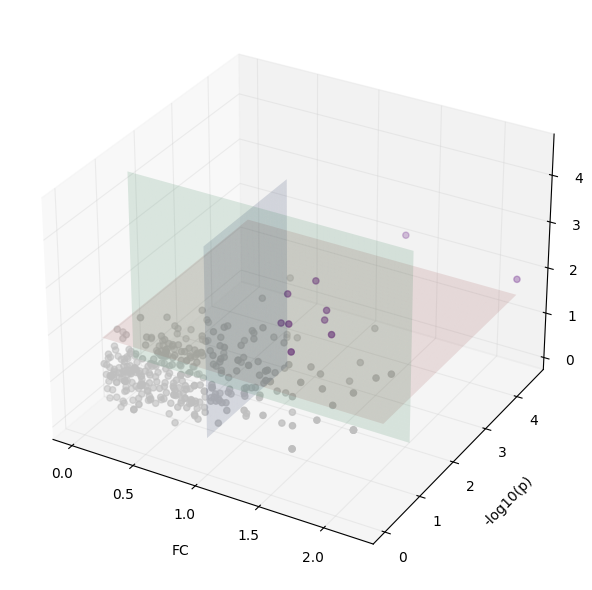

In [61]:
# 创建图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 散点图
ax.scatter(x, y, z, c=colors, s=20)

# 平面用柔和颜色 & 低透明度
# 网格，直接从坐标轴起始点（最小值）到最大值
grid_x, grid_y = np.meshgrid(np.linspace(x.min(), x.max(), 50),
                             np.linspace(y.min(), y.max(), 50))

# Z = z_cutoff 平面
zz = np.full_like(grid_x, z_cutoff)
ax.plot_surface(grid_x, grid_y, zz, alpha=0.15, color='indianred')

# Y = y_cutoff 平面
yy = np.full_like(grid_x, y_cutoff)
ax.plot_surface(grid_x, yy, grid_y, alpha=0.15, color='seagreen')

# X = +x_cutoff 平面（仅正方向）
xx_pos = np.full_like(grid_x, x_cutoff)
ax.plot_surface(xx_pos, grid_x, grid_y, alpha=0.15, color='royalblue')

# 坐标轴标签
ax.set_xlabel('FC', labelpad=10)
ax.set_ylabel('-log10(p)', labelpad=10)
ax.set_zlabel('V1', labelpad=10)

# 设置刻度字体
ax.tick_params(labelsize=10)

# 干净的网格线样式
ax.xaxis._axinfo["grid"]['color'] = (0.8, 0.8, 0.8, 0.3)
ax.yaxis._axinfo["grid"]['color'] = (0.8, 0.8, 0.8, 0.3)
ax.zaxis._axinfo["grid"]['color'] = (0.8, 0.8, 0.8, 0.3)

# 图标题（可选）
# ax.set_title('3D Scatter with Cutoff Planes', fontsize=12)

# 紧凑布局 & 保存
plt.tight_layout()
# plt.savefig("3D_cutoff_plot.pdf", dpi=300)  # 可取消注释保存
#plt.tight_layout()
plt.savefig("3D_cutoff_plot_with_labels.pdf", dpi=300)  # 保存为可编辑的 PDF

plt.show()

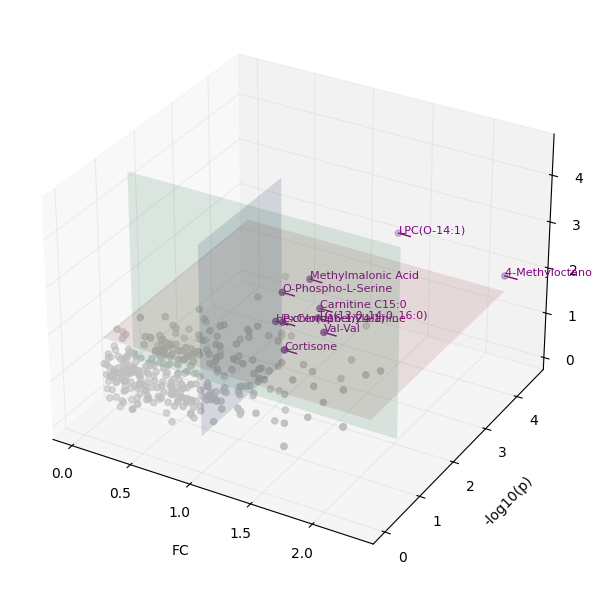

In [60]:
# 创建图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 散点图
ax.scatter(x, y, z, c=colors, s=20)

# 标注紫色点
for i in range(len(x)):
    if colors[i] == '#7E3F98':  # 只处理紫色点
        ax.text(x[i], y[i], z[i], gene_names[i], color='purple', fontsize=8)

        # 可选：连线到点（微调连接线的位置）
        ax.plot([x[i], x[i] + 0.1], [y[i], y[i]], [z[i], z[i]], color='purple', lw=1)

# 平面用柔和颜色 & 低透明度
# 网格，直接从坐标轴起始点（最小值）到最大值
grid_x, grid_y = np.meshgrid(np.linspace(x.min(), x.max(), 50),
                             np.linspace(y.min(), y.max(), 50))

# Z = z_cutoff 平面
zz = np.full_like(grid_x, z_cutoff)
ax.plot_surface(grid_x, grid_y, zz, alpha=0.15, color='indianred')

# Y = y_cutoff 平面
yy = np.full_like(grid_x, y_cutoff)
ax.plot_surface(grid_x, yy, grid_y, alpha=0.15, color='seagreen')

# X = +x_cutoff 平面（仅正方向）
xx_pos = np.full_like(grid_x, x_cutoff)
ax.plot_surface(xx_pos, grid_x, grid_y, alpha=0.15, color='royalblue')

# 坐标轴标签
ax.set_xlabel('FC', labelpad=10)
ax.set_ylabel('-log10(p)', labelpad=10)
ax.set_zlabel('V1', labelpad=10)

# 设置刻度字体
ax.tick_params(labelsize=10)

# 干净的网格线样式
ax.xaxis._axinfo["grid"]['color'] = (0.8, 0.8, 0.8, 0.3)
ax.yaxis._axinfo["grid"]['color'] = (0.8, 0.8, 0.8, 0.3)
ax.zaxis._axinfo["grid"]['color'] = (0.8, 0.8, 0.8, 0.3)

# 图标题（可选）
# ax.set_title('3D Scatter with Cutoff Planes', fontsize=12)

# 紧凑布局 & 保存
plt.tight_layout()
# plt.savefig("3D_cutoff_plot_with_labels.pdf", dpi=300)  # 可取消注释保存

plt.show()